In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [252]:
df=pd.read_csv('/home/hungcucu/Documents/usth/machine learning/Practice_1/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [253]:
df["x0"]=1
X=df[['x0','TV','radio','newspaper']]
X

,x0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,1,17.2,45.9,69.3
3,1,151.5,41.3,58.5
4,1,180.8,10.8,58.4
...,...,...,...,...
195,1,38.2,3.7,13.8
196,1,94.2,4.9,8.1
197,1,177.0,9.3,6.4
198,1,283.6,42.0,66.2


In [254]:
Y=df['sales']
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [255]:
####normalize
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X['x0']=1
X

,x0,TV,radio,newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593
...,...,...,...,...
195,1,-1.267759,-1.317724,-0.769287
196,1,-0.615491,-1.236899,-1.031011
197,1,0.348934,-0.940539,-1.109069
198,1,1.590574,1.261955,1.636743


In [256]:
print(X[0:10], "\n", Y[0:10])


   x0        TV     radio  newspaper
0   1  0.967425  0.979066   1.774493
1   1 -1.194379  1.080097   0.667903
2   1 -1.512360  1.524637   1.779084
3   1  0.051919  1.214806   1.283185
4   1  0.393196 -0.839507   1.278593
5   1 -1.611365  1.726701   2.040809
6   1 -1.042960  0.642293  -0.323896
7   1 -0.312652 -0.246787  -0.870303
8   1 -1.612530 -1.425491  -1.357019
9   1  0.614501 -1.391814  -0.429504 
 [ 1.54816813 -0.69430382 -0.90513451  0.85817677 -0.21514314 -1.30762948
 -0.42597384 -0.15764386 -1.76762372 -0.65597096]


In [257]:
import random
def initialize(dim):
    theta=np.random.rand(dim)
    return theta

In [258]:
def predict_Y(theta,X):
    return np.dot(X,theta)


In [259]:
import math
def get_cost(Y,Y_hat):
    return np.sum(np.dot((Y_hat-Y).T,Y_hat-Y))/len(Y)
def update_theta(x,y,y_hat,theta_o,learning_rate):
    dw=(np.dot((y_hat-y),x))*2/len(y)
    theta_1=theta_o-learning_rate*dw
    return theta_1

In [260]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_theta=theta
        theta=update_theta(X,Y,Y_hat,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of theta : ",theta)
    return gd_iterations_df,theta
 




In [265]:
gd_iterations_df,theta = run_gradient_descent(X,Y,0.01,250)


Final Estimate of theta :  [ 0.00163121  0.749918    0.53413037 -0.00094128]


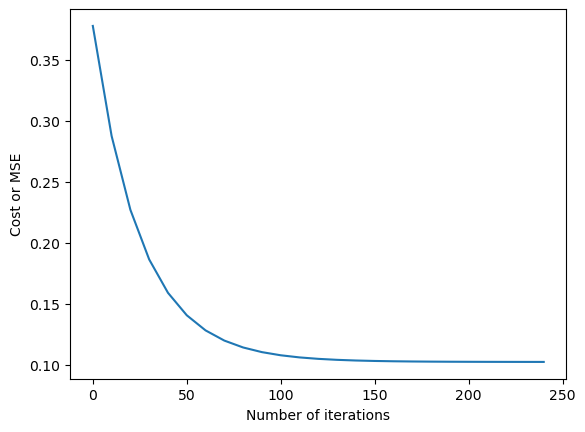

    iteration      cost
20      200.0  0.102407
21      210.0  0.102368
22      220.0  0.102341
23      230.0  0.102322
24      240.0  0.102308


In [266]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")
plt.show()
print(gd_iterations_df.tail())